In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata

In [ ]:
minst = fetch_mldata('MNIST Original', data_home='./MNIST_data')

f:\my_projects\env\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
f:\my_projects\env\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
mnist

In [ ]:
X, y = mnist['data'], mnist['target']

In [ ]:
X.shape

In [ ]:
X_train = np.array(X[:, 6000], dtype=float)
y_train = np.array(y[:, 6000], dtype=float)
X_test = np.array(X[6000, :], dtype=float)
X_test = np.array(X[6000, :], dtype=float)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

#### 使用KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train, y_train)

In [ ]:
%time knn_clf.score(X_test, y_test)

#### PCA进行降维

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.9)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)

In [ ]:
X_train_reduction.shape

#### 再次使用KNN算法，比较耗费的时间

In [ ]:
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train_reduction, y_train)

In [ ]:
X_test_reduction = pca.transform(X_test)

In [ ]:
%time knn_clf.scre(X_test_reduction, y_test)

#### 注：KNN算法中，预测的过程比训练的过程更加耗时

#### 回忆之前的例子

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 5, size=100)

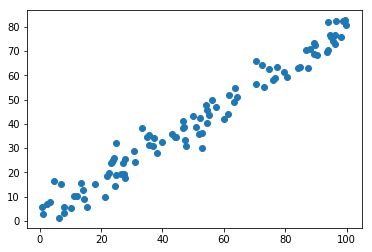

In [7]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

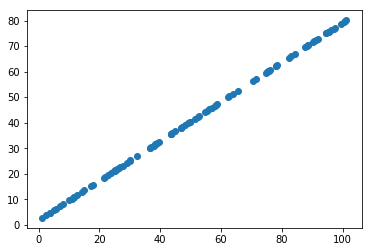

In [11]:
plt.scatter(X_restore[:, 0], X_restore[:, 1])
plt.show()

#### 手写识别的例子

In [12]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [40]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [38]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1, 10):
    X_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits, X_num])

In [39]:
example_digits.shape

(100, 64)

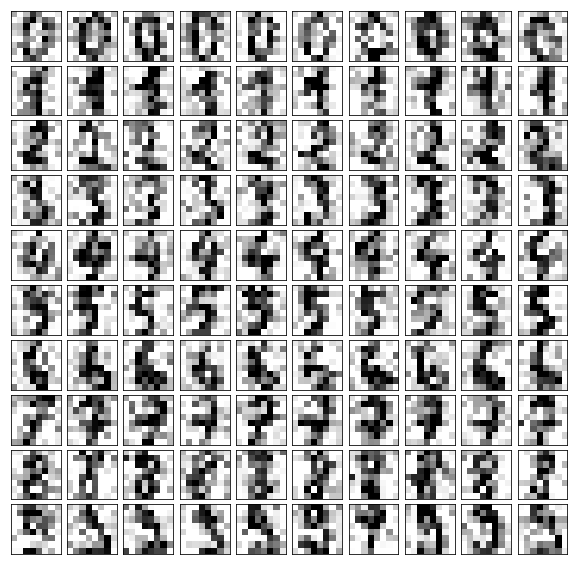

In [43]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),cmap='binary', interpolation='nearest', clim=(0, 16))
        
    plt.show()
    
plot_digits(example_digits)

In [44]:
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
pca.n_components_

12

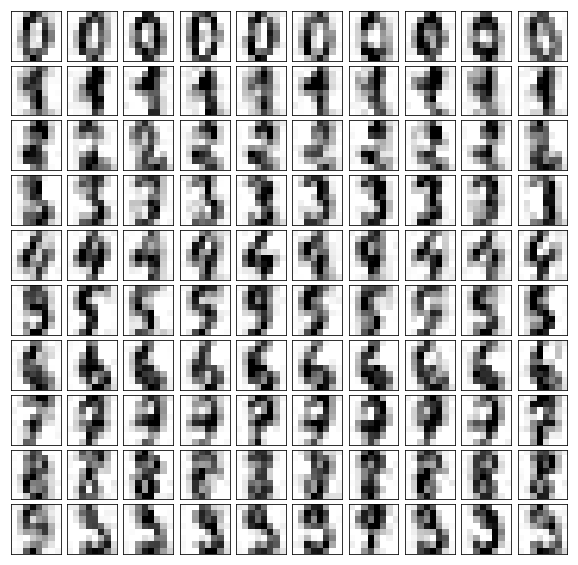

In [46]:
components = pca.transform(example_digits)
filter_digits = pca.inverse_transform(components)
plot_digits(filter_digits)